In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
f3_location = "./f3"
import os
os.sys.path.append(f3_location)
from f3 import photometry

In [3]:
from aperture import run_photometry
from settings import setup_logging
logger = setup_logging()

In [4]:
targ = "3236788"
target = run_photometry(targ)

2018-07-16 09:12:46,134 [INFO]	settings - aperture: run_partial_photometry: done: 3236788


In [5]:
from astropy.modeling import models, fitting

Parameter('amplitude', value=-0.0100548527804) Parameter('phase', value=11.1252846621) Parameter('frequency', value=0.000804603984017)


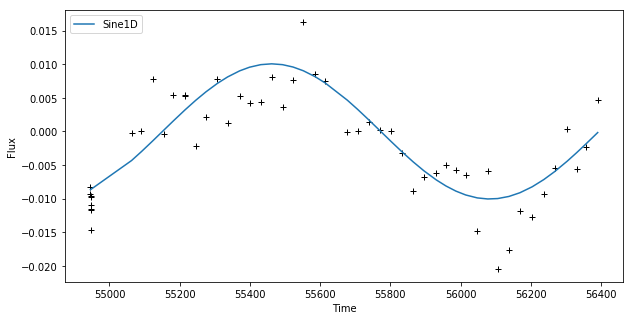

In [43]:
y = target.obs_flux[:]-1
x = target.times[:]

amp = np.ptp(y)/2
freq = 0.001
pha = 0
s_init = models.Sine1D(frequency=freq)
fit_s = fitting.LevMarLSQFitter()
s = fit_s(s_init, x, y)
s_model = s(x)

plt.plot(x, y, 'k+')
plt.plot(x, s_model, label='Sine1D')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.legend(loc=2)

print s.amplitude, s.phase, s.frequency


In [35]:
y = target.obs_flux[:]-1
x = target.times[:]
yerr = target.flux_uncert

freq = 0.001
s_init = models.Sine1D(frequency=freq)
fit_s = fitting.LevMarLSQFitter()
s = fit_s(s_init, x, y)
s_model = s(x) 

print fit_s.fit_info

{u'cov_x': array([[  3.91647218e-02,   8.50987154e-05,  -4.81490853e+00],
       [  8.50987154e-05,   4.46628703e-05,  -2.48421991e+00],
       [ -4.81490853e+00,  -2.48421991e+00,   1.38186105e+05]]), u'fvec': array([-0.00040185,  0.00071114,  0.00089931,  0.0011422 ,  0.0023424 ,
        0.0029058 ,  0.00301885,  0.00599601, -0.0040978 , -0.00300316,
       -0.0091586 ,  0.00048915, -0.00378807, -0.00215776, -0.00206402,
        0.00679446,  0.00372807, -0.0006322 ,  0.00679324,  0.00370489,
        0.00538146,  0.00556563,  0.00198747,  0.00631192,  0.00192264,
       -0.00720128, -0.00037332, -0.00024227,  0.00465873,  0.00326841,
        0.00026648, -0.00011203, -0.0015567 ,  0.00020733,  0.00429735,
        0.00097089, -0.00108005, -0.00311226, -0.00317738, -0.00289773,
        0.00488077, -0.00419247,  0.01054606,  0.00803358,  0.00270693,
        0.00451044,  0.00221304, -0.00057117, -0.00476444,  0.00236026,
        0.00054009, -0.0047787 ]), u'ierr': 1, u'qtf': array([ -4.938

2018-07-16 09:34:10,555 [WARNING]	astropy - logger:         _showwarning: Model is linear in parameters; consider using linear fitting methods.


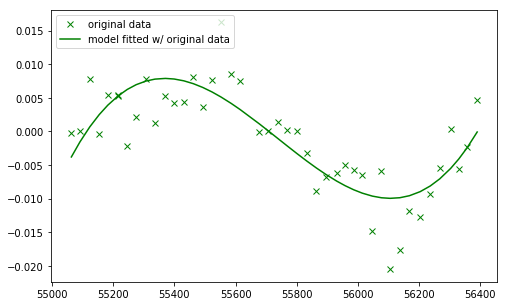

In [8]:
import numpy as np
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting
import scipy.stats as stats
from matplotlib import pyplot as plt

# Generate fake data with outliers
y = target.obs_flux[8:]-1
x = target.times[8:]

g_init = models.Polynomial1D(3)

# initialize fitters
fit = fitting.LevMarLSQFitter()

# get fitted model and filtered data
fitted_model = fit(g_init, x, y)

# plot data and fitted models
plt.figure(figsize=(8,5))
plt.plot(x, y, 'gx', label="original data")
plt.plot(x, fitted_model(x), 'g-',
         label="model fitted w/ original data")
plt.legend(loc=2, numpoints=1)

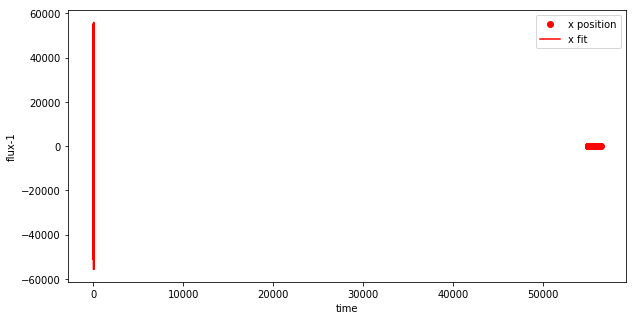

In [31]:
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

ty = target.obs_flux[:]-1
tx = target.times[:]

# Fit the first set
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [1, 0.01, 50000] 
p1, success = optimize.leastsq(errfunc, p0[:], args=(tx, ty))

plt.plot(x, y, "ro", fitfunc(p1, tx), "r-") # Plot of the data and the fit

plt.xlabel("time")
plt.ylabel("flux-1")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

plt.show()

[  1.00548520e-02   8.04606229e-04   1.67290815e+02]


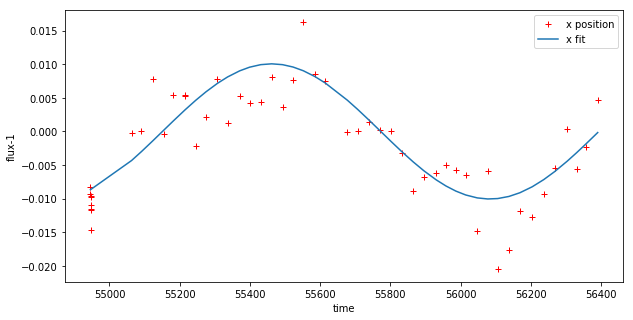

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import pi

ty = target.obs_flux[:]-1
tx = target.times[:]

# Fit the first set
fitfunc = lambda p, x: p[0]*np.sin(2*pi*p[1]*x + p[2]) # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-0.01, 0.001, 100.12] 
p, success = optimize.leastsq(errfunc, p0[:], args=(tx, ty))

print p

# Parameter('amplitude', value=-0.0100548527804) 
# Parameter('phase', value=11.1252846621) 
# Parameter('frequency', value=0.000804603984017)



plt.plot(tx, ty, "r+") # Plot of the data and the fit
plt.plot(tx, fitfunc(p, tx))

plt.xlabel("time")
plt.ylabel("flux-1")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

plt.show()